In [1]:
#This dataset shows traffic to and from the Airport as a Percentage of the Traffic volume during the baseline period. 
#The baseline period used for computing this metric is from 1st Feb to 15th March 2020. 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid_impact_on_airport_traffic.csv')
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [3]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  5936 non-null   object 
 1   Date               5936 non-null   object 
 2   Version            5936 non-null   float64
 3   AirportName        5936 non-null   object 
 4   PercentOfBaseline  5936 non-null   int64  
 5   Centroid           5936 non-null   object 
 6   City               5936 non-null   object 
 7   State              5936 non-null   object 
 8   ISO_3166_2         5936 non-null   object 
 9   Country            5936 non-null   object 
 10  Geography          5936 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 510.2+ KB


In [4]:
#cleaning data, removing unnecessary columns
df.drop(['AggregationMethod', 'Centroid', 'Geography'], axis=1, inplace=True)

In [5]:
#Showing data for just the USA
df[df.Country == 'United States of America (the)'].T

,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,...,5926,5927,5928,5929,5930,5931,5932,5933,5934,5935
Date,2020-05-06,2020-07-04,2020-09-24,2020-10-05,2020-07-30,2020-04-07,2020-07-14,2020-09-15,2020-09-23,2020-05-18,...,2020-09-11,2020-08-05,2020-08-24,2020-09-26,2020-06-19,2020-06-15,2020-10-15,2020-04-01,2020-05-12,2020-10-11
Version,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AirportName,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,Los Angeles International,...,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International,Seattle-Tacoma International
PercentOfBaseline,66,36,78,78,70,59,79,83,78,60,...,69,72,58,54,68,64,74,65,65,57
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac,SeaTac
State,California,California,California,California,California,California,California,California,California,California,...,Washington,Washington,Washington,Washington,Washington,Washington,Washington,Washington,Washington,Washington
ISO_3166_2,US-CA,US-CA,US-CA,US-CA,US-CA,US-CA,US-CA,US-CA,US-CA,US-CA,...,US-WA,US-WA,US-WA,US-WA,US-WA,US-WA,US-WA,US-WA,US-WA,US-WA
Country,United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),...,United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the),United States of America (the)


In [6]:
#The date range in which the data covers
min(df['Date']), max(df['Date'])

('2020-03-16', '2020-10-16')

In [7]:
#Checking for missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Date,0,0.0
Version,0,0.0
AirportName,0,0.0
PercentOfBaseline,0,0.0
City,0,0.0
State,0,0.0
ISO_3166_2,0,0.0
Country,0,0.0


In [8]:
#Checking for duplicate Airport Names
df['AirportName'].value_counts().head()

Los Angeles International                    215
Dallas/Fort Worth International              215
John F. Kennedy International                215
Montreal Trudeau                             215
Hartsfield-Jackson Atlanta International     215
Name: AirportName, dtype: int64

In [9]:
#Checking for duplicates when date is added, which now there are none
(df['AirportName'] + ', ' + df['Date']).value_counts().head()

Edmonton International, 2020-03-20           1
Toronto Pearson, 2020-09-20                  1
Newark Liberty International , 2020-05-27    1
Boston Logan International , 2020-04-04      1
Winnipeg International, 2020-04-26           1
dtype: int64

In [20]:
#A list of all of the USA Airports with duplicates removed
df_country = df[df.Country == 'United States of America (the)']['AirportName'].drop_duplicates()
print(df_country)

2294                    Los Angeles International
2509                  San Francisco International
2723                         Denver International
2937                         Miami International 
3151    Hartsfield-Jackson Atlanta International 
3366              Daniel K. Inouye International 
3580                  Chicago OHare International
3794                  Boston Logan International 
4008           Detroit Metropolitan Wayne County 
4222              Charlotte Douglas International
4436                Newark Liberty International 
4650                       McCarran International
4864                                    LaGuardia
5078                John F. Kennedy International
5293             Dallas/Fort Worth International 
5508             Washington Dulles International 
5722                Seattle-Tacoma International 
Name: AirportName, dtype: object


In [21]:
#Looking at data just for LAX(Los Angeles International)
dflax = df[df.AirportName=='Los Angeles International']
print(dflax)

            Date  Version                AirportName  PercentOfBaseline  \
2294  2020-05-06      1.0  Los Angeles International                 66   
2295  2020-07-04      1.0  Los Angeles International                 36   
2296  2020-09-24      1.0  Los Angeles International                 78   
2297  2020-10-05      1.0  Los Angeles International                 78   
2298  2020-07-30      1.0  Los Angeles International                 70   
...          ...      ...                        ...                ...   
2504  2020-09-04      1.0  Los Angeles International                 79   
2505  2020-04-13      1.0  Los Angeles International                 59   
2506  2020-06-08      1.0  Los Angeles International                 69   
2507  2020-07-09      1.0  Los Angeles International                 73   
2508  2020-06-18      1.0  Los Angeles International                 71   

             City       State ISO_3166_2                         Country  
2294  Los Angeles  Calif

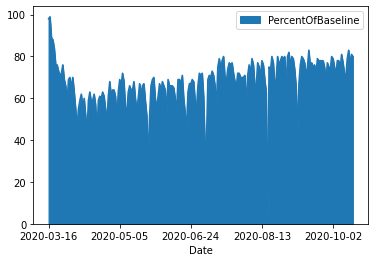

In [15]:
#showing percent of baseline change at LAX from 3/16/2020 - 10/02/2020
dflax.sort_values(by='Date').plot(x='Date',y='PercentOfBaseline',kind='area')

In [31]:
#average percent of baseline change at LAX from 3/16-10/02 2020
dflax.mean()

Version               1.000000
PercentOfBaseline    67.962791
dtype: float64

In [30]:
#Percent of baseline change for all airports from 3/16-10/02 2020
df.groupby('AirportName').mean()

,Version,PercentOfBaseline
AirportName,,
Boston Logan International,1.0,64.252336
Calgary International,1.0,88.084112
Charlotte Douglas International,1.0,75.757009
Chicago OHare International,1.0,72.144860
Dallas/Fort Worth International,1.0,72.065116
Daniel K. Inouye International,1.0,86.471963
Denver International,1.0,55.294393
Detroit Metropolitan Wayne County,1.0,47.093458
Edmonton International,1.0,70.370370
